<a href="https://colab.research.google.com/github/minig0n/PSI3471/blob/main/tira_ruido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm

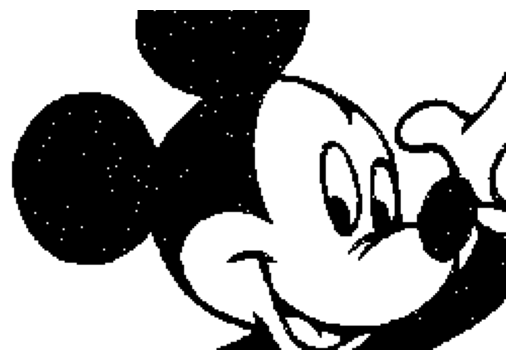

In [ ]:
# Carregar imagem
img = cv2.imread('./basico/mickeyruibr.bmp')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Mostrar imagem com ruído
plt.imshow(img, cmap=cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()

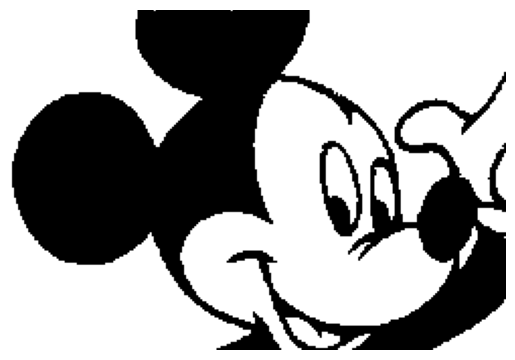

In [ ]:
a, l = img.shape

img_clean = np.copy(img)

# Para cada pixel da imagem
for y in range(1, a-1):
    for x in range(1, l-1):

        # Se o pixel for branco
        if img[y, x] == 255:

            # Verificar os pixels ao redor
            top = img[y-1, x]
            left = img[y, x-1]
            right = img[y, x+1]
            bottom = img[y+1, x]

            # Se todos os pixels ao redor forem pretos
            if top == 0 and left == 0 and right == 0 and bottom == 0:

                # Atribuir valor zero ao pixel
                img_clean[y, x] = 0

# Mostrar imagem corrigida
plt.imshow(img_clean, cmap=cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()

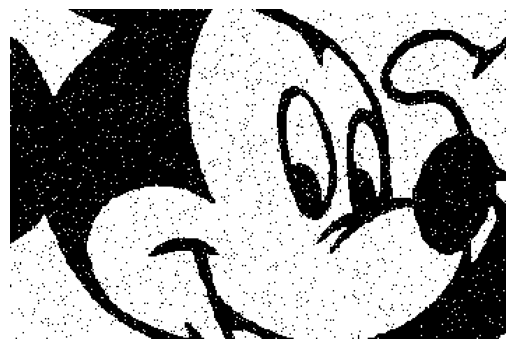

In [ ]:
# Carregar imagem
img = cv2.imread('./basico/mickeyr.bmp')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Mostrar imagem com ruído
plt.imshow(img, cmap=cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()

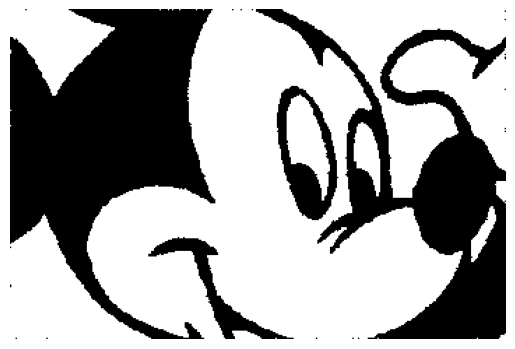

In [ ]:
a, l = img.shape

img_clean = np.copy(img)

# Para cada pixel na imagem
for y in range(1, a-1):
    for x in range(1, l-1):

        # O kernel equivale a uma matriz 3x3 com os pontos ao redor normalizados
        kernel = 1/255 * np.array([[img[y-1, x-1], img[y-1, x], img[y-1, x+1]],
                                    [img[y, x-1], img[y, x], img[y, x+1]],
                                    [img[y+1, x-1], img[y+1, x], img[y+1, x+1]]])

        # Calcula a soma dos valores no kernel
        kernel_sum = np.sum(kernel)

        # Se o pixel for branco e a soma do kernel pequena, corrigir o pixel para preto
        if img[y, x] == 255 and kernel_sum <= 3:
            img_clean[y, x] = 0

        # Se o pixel for preto e a soma do kernel grande, corrigir o pixel para branco
        elif img[y, x] == 0 and kernel_sum >= 6:
            img_clean[y, x] = 255

plt.imshow(img_clean, cmap=cm.gray, vmin=0, vmax=255)
plt.axis('off')
plt.show()